# Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

## 1. Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
# Define data path
data_path = r"..\..\day_4\lab-eda-univariate\amazon dataset\amz_uk_price_prediction_dataset.csv"

# Create a DataFrame 
data = pd.read_csv(data_path)

# Confirm DataFrame loaded
data.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Create a copy of from original DataFrame
df = data.copy()

In [4]:
# Display the DataFrame
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
# Create crosstab between 'category' and 'isBestSeller'
cat_bestseller_cross_tab = pd.crosstab(df['category'], df['isBestSeller'])

# Overview of the crosstab DataFrame
print(type(cat_bestseller_cross_tab))
print(cat_bestseller_cross_tab.shape)

# Display the DataFrame
cat_bestseller_cross_tab

<class 'pandas.core.frame.DataFrame'>
(296, 2)


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
# Calculate numbers of best seller products.
cat_bestseller_cross_tab.sum()              

isBestSeller
False    2435671
True        7980
dtype: int64

- There are 7980 products which are best sellers in different categories

In [7]:
# Filter out top-10 best seller categories
top10_best_seller = cat_bestseller_cross_tab[True].sort_values(ascending= False).head(10)

print(type(top10_best_seller))

# Print the top10 best seller categories
top10_best_seller.head(10)

<class 'pandas.core.series.Series'>


category
Grocery                   556
Health & Personal Care    552
Baby                      341
Sports & Outdoors         330
Power & Hand Tools        306
Beauty                    302
Pet Supplies              285
Arts & Crafts             230
Women                     213
Men                       169
Name: True, dtype: int64

In [8]:
# Crosstab between 'category' and 'isBestSeller' 
cat_bestseller_normalise_cross_tab = pd.crosstab(df['category'], df['isBestSeller'], normalize= "index").round(decimals=3)

print(type(cat_bestseller_normalise_cross_tab))

# Display DataFrame with propotinate
cat_bestseller_normalise_cross_tab

<class 'pandas.core.frame.DataFrame'>


isBestSeller,False,True
category,,
3D Printers,0.996,0.004
3D Printing & Scanning,1.000,0.000
Abrasive & Finishing Products,0.980,0.020
Action Cameras,0.999,0.001
Adapters,0.988,0.012
...,...,...
Wind Instruments,0.972,0.028
Window Treatments,0.979,0.021
Women,0.988,0.012


In [9]:
# Display top_10 categories which are best sellers
cat_bestseller_normalise_cross_tab.sort_values(by= True, ascending= False).head(10)

isBestSeller,False,True
category,,
Smart Home Security & Lighting,0.942,0.058
Grocery,0.942,0.058
Health & Personal Care,0.942,0.058
Mobile Phone Accessories,0.958,0.042
Power & Hand Tools,0.965,0.035
"Billiard, Snooker & Pool",0.968,0.032
Pet Supplies,0.970,0.030
Home Brewing & Wine Making,0.972,0.028
Mirrors,0.972,0.028


In [10]:
# ----Direct Method----

# Filter out best_seller 
best_seller = df[df['isBestSeller']==True]

best_seller.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
15,16,B09B97BPSW,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
17,18,B09B8XRZYB,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
36,37,B08L84ST93,Bose Solo Soundbar Series II - TV Speaker with...,4.6,2799,169.00,True,0,Hi-Fi Speakers
55,56,B08CMJ2YZX,"Sanyun SW208 3"" Active Bluetooth 5.0 Bookshelf...",4.4,974,59.49,True,0,Hi-Fi Speakers


In [11]:
best_seller_counts = best_seller["category"].value_counts()
best_seller_counts

category
Grocery                       556
Health & Personal Care        552
Baby                          341
Sports & Outdoors             330
Power & Hand Tools            306
                             ... 
Hiking Hand & Foot Warmers      1
Gifts for Him                   1
Network Cards                   1
Motorbike Instruments           1
Snowboard Bindings              1
Name: count, Length: 260, dtype: int64

In [12]:
best_seller_counts_sorted = best_seller_counts.sort_values(ascending= False)

# best top-10 sellers 
best_seller_counts_sorted.head(10)

category
Grocery                   556
Health & Personal Care    552
Baby                      341
Sports & Outdoors         330
Power & Hand Tools        306
Beauty                    302
Pet Supplies              285
Arts & Crafts             230
Women                     213
Men                       169
Name: count, dtype: int64

#### **Chi-test**

In [13]:
_, chi2_pvalue, _, _  = chi2_contingency(cat_bestseller_cross_tab)

# p_score = chi2_pvalue

print(chi2_pvalue)

# 
if chi2_pvalue < 0.05:
    print("There is a significant relationship between category and best-seller status")
else:
    print("No significant relationship between category and best-seller status")

0.0
There is a significant relationship between category and best-seller status


### Cramér’s V Interpretation Guide (Cohen's Conventions)

| Cramér’s V | Strength of Association   |
|------------|----------------------------|
| 0.00–0.10  | Negligible / Very Weak     |
| 0.10–0.20  | Weak                       |
| 0.20–0.30  | Moderate                   |
| 0.30–0.50  | Strong                     |
| > 0.50     | Very Strong                |


In [14]:
association(cat_bestseller_cross_tab, method='cramer')

0.1222829439760564

Text(0, 0.5, 'Best Selling Portions')

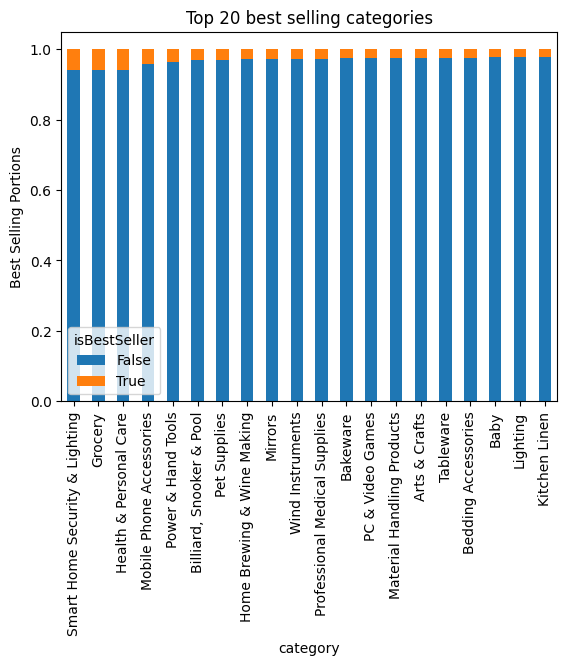

In [15]:
plt.Figure(figsize=(8,6))
cat_bestseller_normalise_cross_tab.sort_values(by= True, ascending= False).head(20).plot(kind='bar', stacked=True)
plt.title("Top 20 best selling categories")
plt.xlabel("category")
plt.ylabel("Best Selling Portions")

Text(0, 0.5, 'Only best Selling Portions')

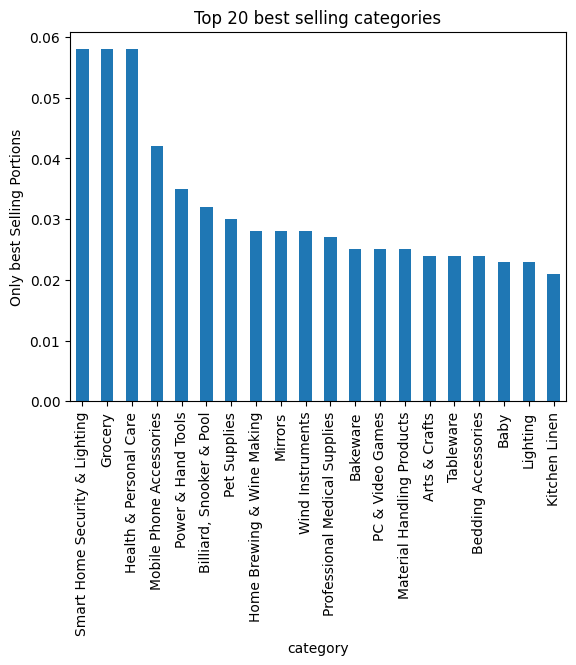

In [16]:
# Display only best selling categories
plt.Figure(figsize=(8,6))
cat_bestseller_normalise_cross_tab[True].sort_values(ascending= False).head(20).plot(kind='bar', stacked=True)
plt.title("Top 20 best selling categories")
plt.xlabel("category")
plt.ylabel("Only best Selling Portions")

# 2. Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

In [17]:
df["price"].describe().round()

count    2443651.0
mean          89.0
std          346.0
min            0.0
25%           10.0
50%           19.0
75%           46.0
max       100000.0
Name: price, dtype: float64

In [18]:
# Interquartile Range (IQR)
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
price_iqr = Q3 - Q1


lower_bound = Q1 - 1.5*price_iqr
upper_bound = Q3 + 1.5*price_iqr

Q1, Q3, price_iqr, lower_bound, upper_bound

(np.float64(9.99),
 np.float64(45.99),
 np.float64(36.0),
 np.float64(-44.01),
 np.float64(99.99000000000001))

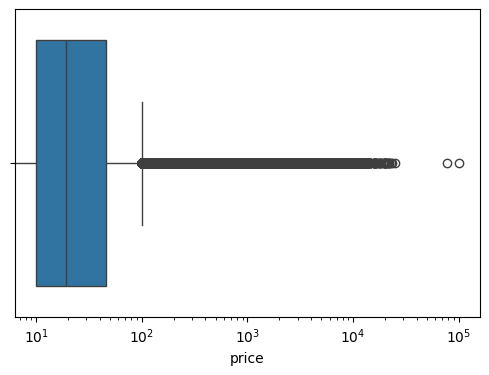

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df, x="price")
plt.xscale('log')

- The most of the product pricing is between $9.99 to $99.9. The values above $100 are considered as outliers.

In [20]:
outlier_df = df[(df.price < lower_bound) | (df.price> upper_bound)]
outlier_df['price'].describe()

count    327688.000000
mean        514.360281
std         824.201099
min         100.000000
25%         149.670000
50%         249.980000
75%         538.410000
max      100000.000000
Name: price, dtype: float64

In [21]:
df = df[((df.price >= lower_bound) & (df.price <= upper_bound))]
df['price'].describe().round()

count    2115963.0
mean          23.0
std           21.0
min            0.0
25%            9.0
50%           16.0
75%           30.0
max          100.0
Name: price, dtype: float64

In [22]:
df.groupby('category')['price'].describe().sort_index()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
3D Printers,36.0,55.739722,31.414466,5.99,24.4900,52.195,86.9525,99.00
3D Printing & Scanning,3253.0,35.623904,22.925228,1.94,17.6900,28.580,49.1800,99.14
Abrasive & Finishing Products,247.0,14.427611,11.395444,2.25,6.9900,10.150,16.9900,85.99
Action Cameras,1072.0,38.936875,25.272347,2.59,18.0350,33.135,55.2225,99.99
Adapters,254.0,8.750197,6.257183,1.99,5.3925,7.050,9.9900,67.18
...,...,...,...,...,...,...,...,...
Wind Instruments,118.0,18.935339,16.888002,3.00,8.8950,13.470,20.1000,90.39
Window Treatments,237.0,19.870633,10.841952,3.99,12.9900,17.990,24.4900,69.99
Women,17476.0,20.408735,15.671554,1.54,9.9900,15.990,24.0000,99.99


In [23]:
df.shape

(2115963, 9)

In [24]:
top20_cat_by_price = df['category'].value_counts().head(20).index

df_top20_cat_by_price = df[df['category'].isin(top20_cat_by_price)]

df_top20_cat_by_price.shape

(1033008, 9)

In [25]:
top20_cat_by_price

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [26]:
type(df_top20_cat_by_price)

pandas.core.frame.DataFrame

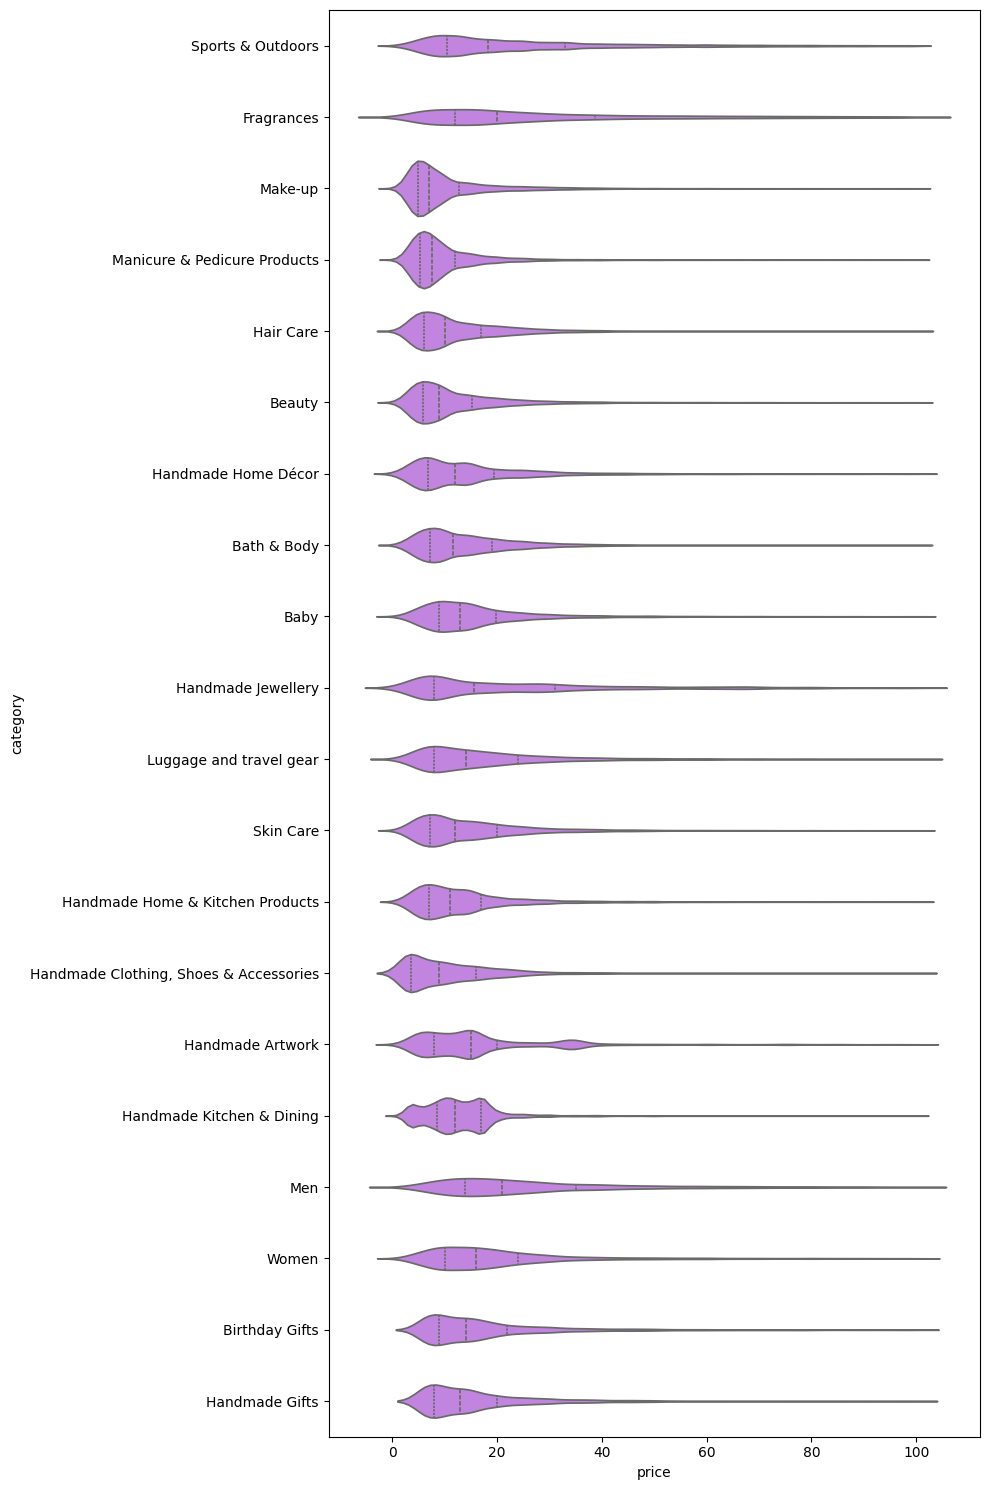

In [27]:
plt.figure(figsize=(10,15))
sns.violinplot(
    data= df_top20_cat_by_price[['category','price']].sort_values(by='price'),
    y = 'category',
    x = 'price',
    inner= 'quartile',
    color="#C675EE0B"
)
plt.tight_layout()
plt.show()

In [28]:
df_top20_cat_by_price.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Baby,14883.0,16.389799,12.500616,0.60,8.9900,12.990,19.790,99.99
Bath & Body,19050.0,14.678683,11.115793,0.41,7.2000,11.635,18.980,99.95
Beauty,19233.0,12.523480,11.151616,0.26,5.9000,8.990,15.190,99.99
Birthday Gifts,18398.0,18.600195,15.259251,4.95,8.9500,13.990,21.950,99.99
Fragrances,17431.0,28.544912,23.022170,0.01,11.9900,20.000,38.615,99.99
Hair Care,18625.0,13.461408,11.479148,0.26,5.9900,9.970,16.990,99.99
Handmade Artwork,17269.0,17.461758,14.623101,0.99,7.9900,14.990,20.000,99.99
"Handmade Clothing, Shoes & Accessories",18811.0,12.958639,14.144333,0.99,3.6000,8.990,16.000,99.95
Handmade Gifts,17948.0,17.395112,14.255563,4.99,7.9900,12.990,20.000,99.99


In [29]:
median_price_filter = df_top20_cat_by_price.groupby('category')['price'].median()
median_price_sorted_filter = median_price_filter.sort_values(ascending=False)
median_price_sorted_filter.head(1)

category
Men    20.99
Name: price, dtype: float64

In [30]:
median_price_without_filter = df.groupby('category')['price'].agg('median').nlargest(1)

median_price_without_filter

category
Desktop PCs    74.0
Name: price, dtype: float64

In [31]:
top10_cat_by_price= df_top20_cat_by_price['category'].value_counts().head(10).index
df_top10_cat_by_price = df[df['category'].isin(top10_cat_by_price)]
df_top10_cat_by_price

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [32]:
df_top10_cat_by_price.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Bath & Body,19050.0,14.678683,11.115793,0.41,7.20,11.635,18.980,99.95
Beauty,19233.0,12.523480,11.151616,0.26,5.90,8.990,15.190,99.99
Birthday Gifts,18398.0,18.600195,15.259251,4.95,8.95,13.990,21.950,99.99
Hair Care,18625.0,13.461408,11.479148,0.26,5.99,9.970,16.990,99.99
"Handmade Clothing, Shoes & Accessories",18811.0,12.958639,14.144333,0.99,3.60,8.990,16.000,99.95
Handmade Gifts,17948.0,17.395112,14.255563,4.99,7.99,12.990,20.000,99.99
Make-up,18718.0,10.612918,9.528028,0.01,4.99,7.000,12.785,99.99
Manicure & Pedicure Products,18904.0,10.231825,8.861353,0.01,5.25,7.500,11.990,99.99
Skin Care,18686.0,15.654722,12.532378,0.79,7.24,12.000,19.980,99.99


In [33]:
top10_cat_avg_price = df_top10_cat_by_price.groupby('category')['price'].mean().round(2).sort_values(ascending=False).reset_index(name='avg_price')
print(type(top10_cat_avg_price))
top10_cat_avg_price.shape

<class 'pandas.core.frame.DataFrame'>


(10, 2)

In [34]:
top10_cat_avg_price

,category,avg_price
0,Sports & Outdoors,25.17
1,Birthday Gifts,18.60
2,Handmade Gifts,17.40
3,Skin Care,15.65
4,Bath & Body,14.68
5,Hair Care,13.46
6,"Handmade Clothing, Shoes & Accessories",12.96
7,Beauty,12.52
8,Make-up,10.61
9,Manicure & Pedicure Products,10.23


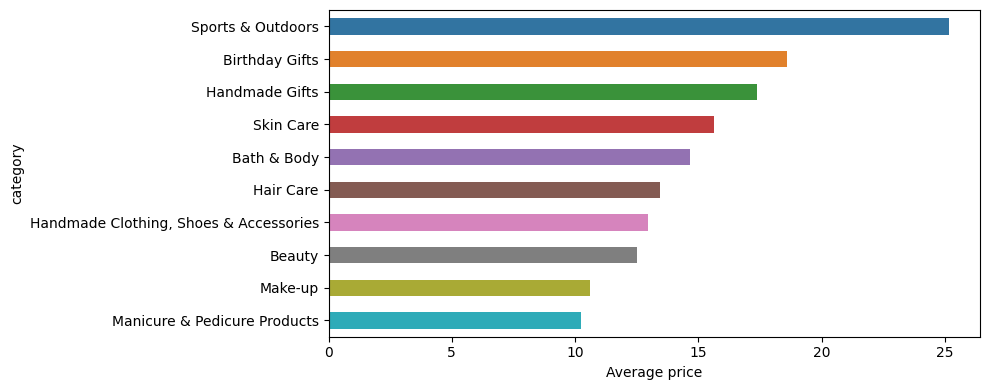

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(
    data= top10_cat_avg_price.sort_index(),
    y = 'category',
    x = 'avg_price',
    # color="#9015CE0A",
    # estimator='mean'
    hue='category',
    width= 0.5,
    legend='auto'
)
# top10_barplot.bar_label(top10_barplot.containers[0], fontsize= 10)
plt.xlabel('Average price')
plt.tight_layout()
plt.show()


In [36]:
# category with highest average price
# This present from the filter category
top10_cat_avg_price.head(1)

,category,avg_price
0,Sports & Outdoors,25.17


In [37]:
# Without filter category from original DataFrame
df.groupby('category')['price'].mean().sort_values(ascending= False).head(5)


category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509
Name: price, dtype: float64

In [38]:
top10_category = df['category'].value_counts().sort_values(ascending= False).head(10).index
top10_category

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [39]:
df_top10 = df[df['category'].isin(top10_category)]
df_top10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [40]:
top10_category.sort_values()

Index(['Bath & Body', 'Beauty', 'Birthday Gifts', 'Hair Care',
       'Handmade Clothing, Shoes & Accessories', 'Handmade Gifts', 'Make-up',
       'Manicure & Pedicure Products', 'Skin Care', 'Sports & Outdoors'],
      dtype='object', name='category')

In [41]:
df_top10['category'].sort_values().unique()

array(['Bath & Body', 'Beauty', 'Birthday Gifts', 'Hair Care',
       'Handmade Clothing, Shoes & Accessories', 'Handmade Gifts',
       'Make-up', 'Manicure & Pedicure Products', 'Skin Care',
       'Sports & Outdoors'], dtype=object)

In [42]:
df_top10['category'].sort_values().unique() == top10_category.sort_values()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
df_top10.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [44]:
df_top10.shape

(862465, 9)

In [45]:
df_top10[df_top10['stars']==float(0)].value_counts().sum()

np.int64(607423)

In [46]:
df_top10_without_0star = df_top10[~(df_top10['stars']==float(0))]

df_top10_without_0star.shape

(255042, 9)

<Axes: xlabel='stars', ylabel='category'>

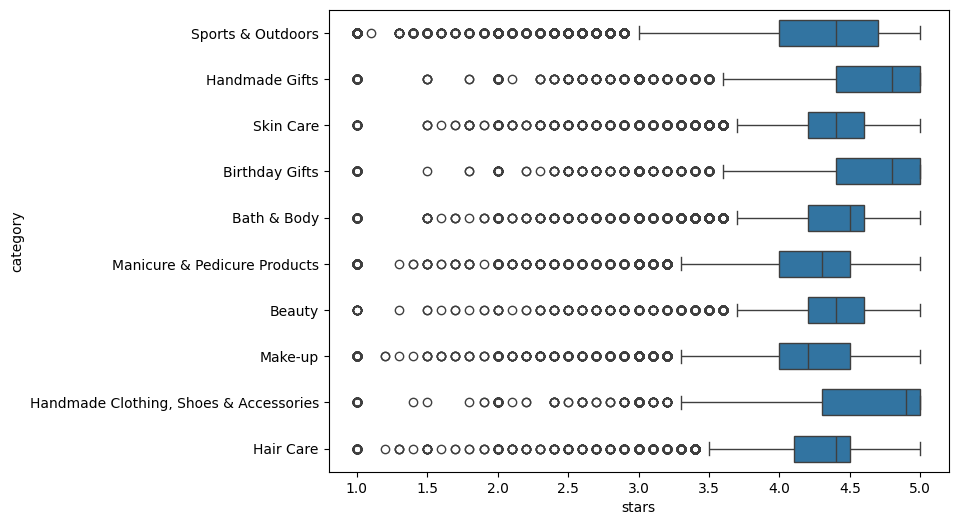

In [47]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df_top10_without_0star,
    x = 'stars',
    y = 'category',
    gap= 0.3
)

In [48]:
# category with highest median rating
df_top10_without_0star.groupby('category')['stars'].median().sort_values(ascending= False).head(1)

category
Handmade Clothing, Shoes & Accessories    4.9
Name: stars, dtype: float64

In [49]:
# Median rating in top10 categories
df_top10_without_0star.groupby('category')['stars'].median().sort_values(ascending= False).head(10)

category
Handmade Clothing, Shoes & Accessories    4.9
Birthday Gifts                            4.8
Handmade Gifts                            4.8
Bath & Body                               4.5
Beauty                                    4.4
Hair Care                                 4.4
Sports & Outdoors                         4.4
Skin Care                                 4.4
Manicure & Pedicure Products              4.3
Make-up                                   4.2
Name: stars, dtype: float64

In [50]:
# Average rating in top10 categories
df_top10_without_0star.groupby('category')['stars'].mean().round().sort_values(ascending= False).head(10)

category
Handmade Clothing, Shoes & Accessories    5.0
Birthday Gifts                            5.0
Handmade Gifts                            5.0
Bath & Body                               4.0
Beauty                                    4.0
Hair Care                                 4.0
Make-up                                   4.0
Manicure & Pedicure Products              4.0
Skin Care                                 4.0
Sports & Outdoors                         4.0
Name: stars, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [51]:
corr_price_stars = df['price'].corr(df['stars'])
corr_price_stars

np.float64(-0.07767299878181444)

- The correlation coefficient between `price` and ``stars`` is negatively associated and it is negligible in value.

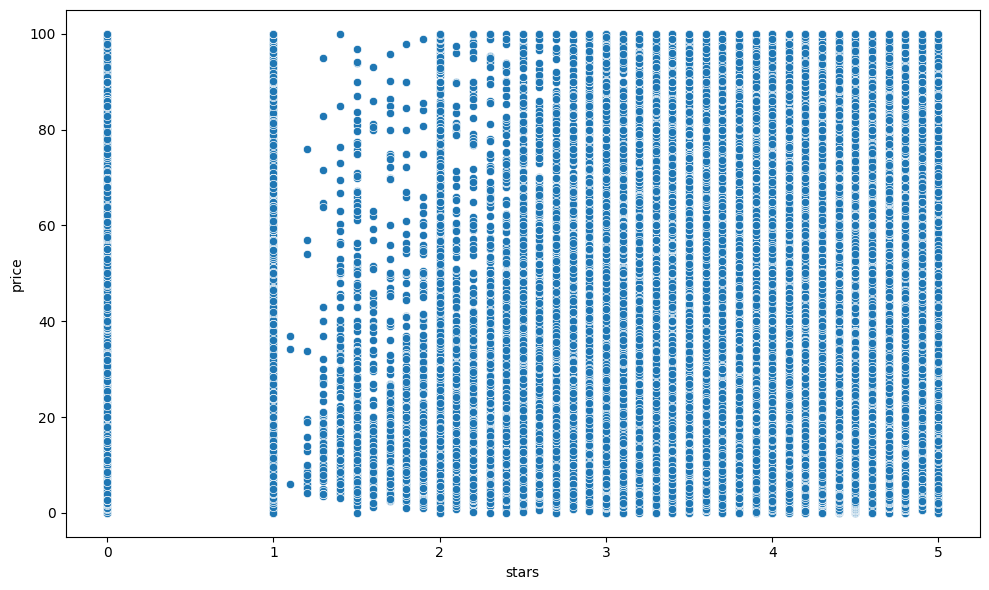

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data = df,
    x = 'stars',
    y = 'price'
)
plt.tight_layout()
plt.show()

- No concrete conclusion can be drawn from this scatter plot. Although the ``stars`` column is of float data type, it represents discrete rating values. As a result, the plot shows vertical clustering and does not reveal any strong relationship between star ratings and price.

In [53]:
num_cols = df_top10.select_dtypes(include=['int', 'float'])
num_cols.columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [54]:
num_cols.drop(columns='uid', inplace=True)
num_cols.head()

,stars,reviews,price,boughtInLastMonth
82163,4.2,3116,6.49,0
82164,4.2,2594,49.99,0
82167,4.5,9879,16.98,0
82168,4.7,1223,19.95,0
82169,4.2,55,49.99,0


In [55]:
corr_matrix = num_cols.corr()
corr_matrix

,stars,reviews,price,boughtInLastMonth
stars,1.000000,0.156721,-0.010715,0.149024
reviews,0.156721,1.000000,-0.027790,0.337004
price,-0.010715,-0.027790,1.000000,-0.057773
boughtInLastMonth,0.149024,0.337004,-0.057773,1.000000


<Axes: >

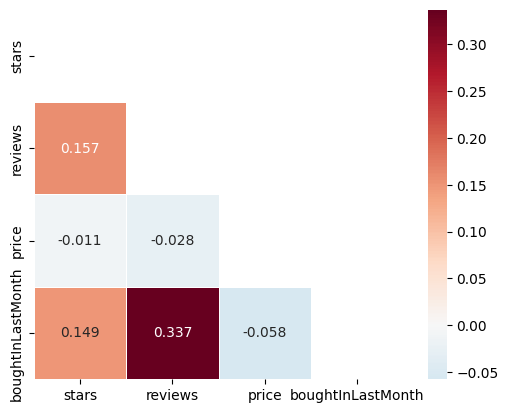

In [56]:
# Mask upper triangle to avoid duplication
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    data= corr_matrix,
    mask=mask,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5,
)

- The correlation analysis shows that review count has a moderate positive relationship with recent purchase activity, while star ratings have only weak associations. 

- Price is largely uncorrelated with the other variables, suggesting it is not a strong linear driver of ratings or buying behavior in this dataset

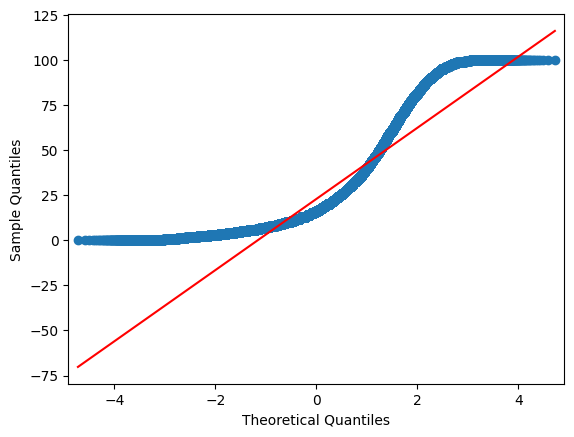

In [57]:
import statsmodels.api as sm

sm.qqplot(df_top10['price'], line='s')
plt.show()

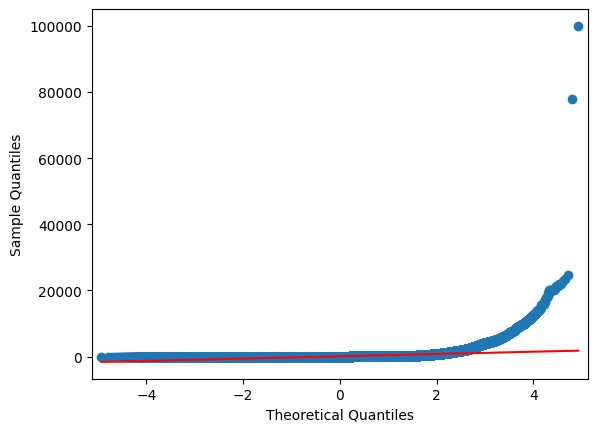

In [58]:
sm.qqplot(data['price'], line='s')
plt.show()